In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2019, GESIS / USC-ISI"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi", 
               "Bruno Ribeiro",
               "Kristina Lerman",
               "Claudia Wagner"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

<h1 style="text-align: center;">Example on Synthetic Network</h1>

<h2>Dependencies</h2>

In [2]:
%load_ext autoreload
%autoreload 2

from org.gesis.network.network import Network
from org.gesis.sampling.sampling import Sampling
from org.gesis.local.local import Local
from org.gesis.relational.relational import Relational
from org.gesis.inference.inference import Inference
from utils import viz
from utils import io

<h2>Parameters</h2>

In [3]:
sampling = "nodes"              # subgraph sampling method (nodes, nedges, degree, neighbors, partial_crawls)
pseeds = 0.9                    # fraction of nodes to sample 
epoch = 1                       # epoch (iteration number #)
LC = "prior"                    # local model
RC = "nBC"                      # relational model
CI = "relaxation"               # inference
IGNORE = 0                      # IGNORE class value
DATAFN = "../data/Caltech36.gpickle"   # networkx graph file path
OUTPUT = "../results-individual"   # directory to store results

<h2>1. Network</h2>

In [4]:
net = Network()
net.load(DATAFN, IGNORE)
net.info()

Name: Caltech36
Type: Graph
Number of nodes: 701
Number of edges: 15464
Average degree:  44.1198
{'km': 50.64912280701754, 'attributes': ['gender'], 'class': 'gender', 'B': 0.3252496433666191, 'm': 1, 'x': None, 'kM': 40.97251585623679, 'fullname': 'Caltech36', 'min_degree': 1, 'n': 701, 'group': ['M', 'm'], 'k': 44.11982881597717, 'b': 0.3252496433666191, 'name': 'Caltech36', 'N': 701, 'labels': [2, 1], 'i': None, 'H': 0.7652598337554604, 'h': 0.6, 'ignoreInt': 0, 'density': 0.0630283268799674, 'e': 15464, 'kind': None}


<h2>2. Sampling</h2>

In [5]:
sam = Sampling(sampling, net.G, pseeds, epoch)
sam.extract_subgraph()
sam.info()

Name: Caltech36
Type: Graph
Number of nodes: 631
Number of edges: 12830
Average degree:  40.6656
{'km': 47.07177033492823, 'attributes': ['gender'], 'class': 'gender', 'B': 0.3312202852614897, 'm': 0, 'x': None, 'kM': 37.492890995260666, 'fullname': 'Caltech36', 'labels': [2, 1], 'ignoreInt': 0, 'k': 40.66561014263075, 'name': 'Caltech36', 'N': 631, 'i': None, 'H': 0.7724388180741051, 'h': 0.6, 'method': 'nodes', 'group': ['M', 'm'], 'density': 0.06454858752798531, 'pseeds': 0.9, 'e': 12830, 'epoch': 1, 'kind': None}


<h2>3. Modeling</h2>

In [6]:
local_model = Local(LC)
local_model.learn(sam.Gseeds)
local_model.info()

2    0.668246
1    0.331754
dtype: float64


In [7]:
relational_model = Relational(RC).get_model()
relational_model.learn(sam.Gseeds)
relational_model.info()

          2         1
2  0.636944  0.363056
1  0.583841  0.416159


<h2>4. Inference</h2>

In [8]:
inference = Inference(CI)
inference.predict(net.G, local_model, relational_model)
inference.evaluation()
inference.summary()
inference.save(OUTPUT)

(1, 1, 0, 0, 1)
(0, 0, 0, 0, 1)
(0.05315675804014493, 0.26250575528066095, 0.4519038943604107, 0.22957445915622388, 0.4856723405470115)

Prediction in 197.99544668197632 seconds
ROCAUC: 0.7131062951496387
ROCAUC curve: 0.7131062951496387
MAE: 0.32857142857142857
ccm: 0.47368421052631576
ccM: 0.7450980392156863
bias: 0.388653683319221

Caltech36_nodes/P90_graph.gpickle saved!
Caltech36_nodes/P90_samplegraph.gpickle saved!
Caltech36_nodes/P90_evaluation.pickle saved!


<h2>5. Results</h2>

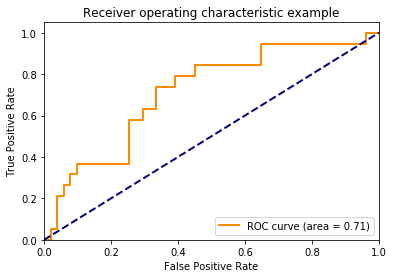

In [9]:
fn = None
viz.plot_rocauc_curve(inference.fpr, inference.tpr, inference.rocauc_curve, fn)